In [59]:
import sys

assert sys.version_info >= (3, 7)
import sklearn

assert sklearn.__version__ >= "1.0.1"
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
from pathlib import Path

IMAGES_PATH = Path() / "images" / "regression"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Data preparation

In [60]:
import pandas as pd

# Load the Bike Shop dataset from Git
url = 'https://raw.githubusercontent.com/VAWi-DataScience/Data-Science-and-Machine-Learning/main/Assignment/WiSe22_23/03_Retail_Clustering.csv'
shoppingDF = pd.read_csv(url, sep=';')
shoppingDF.head()

Year_Birth   Education Marital_Status  Estimated_Income  Kid_home  \
0        1957  Graduation         Single           58138.0         0   
1        1954  Graduation         Single           46344.0         1   
2        1965  Graduation       Together           71613.0         0   
3        1984  Graduation       Together           26646.0         1   
4        1981         PhD        Married           58293.0         1   

   Teen_home Registration_date  Recency  Exist_Complain  MntWines  MntFruits  \
0          0        04.09.2020       58               0       635         88   
1          1        08.03.2022       38               0        11          1   
2          0        21.08.2021       26               0       426         49   
3          0        10.02.2022       26               0        11          4   
4          0        19.01.2022       94               0       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  
0                8                   10                  4  
1                1                    1                  2  
2                8                    2                 10  
3                2                    0                  4  
4                5                    3                  6

In [61]:
shoppingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Estimated_Income     2216 non-null   float64
 4   Kid_home             2240 non-null   int64  
 5   Teen_home            2240 non-null   int64  
 6   Registration_date    2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   Exist_Complain       2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [62]:
# Checking how many missing values there are in general
shoppingDF.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Estimated_Income       24
Kid_home                0
Teen_home               0
Registration_date       0
Recency                 0
Exist_Complain          0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
dtype: int64

In [63]:
shoppingDF.dropna(inplace=True)
shoppingDF.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Estimated_Income       0
Kid_home               0
Teen_home              0
Registration_date      0
Recency                0
Exist_Complain         0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
dtype: int64

In [64]:
# Check if there are any duplicate datasets
shoppingDF.duplicated().sum()

201

In [65]:
shoppingDF.drop_duplicates(inplace=True)
shoppingDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2015 non-null   int64  
 1   Education            2015 non-null   object 
 2   Marital_Status       2015 non-null   object 
 3   Estimated_Income     2015 non-null   float64
 4   Kid_home             2015 non-null   int64  
 5   Teen_home            2015 non-null   int64  
 6   Registration_date    2015 non-null   object 
 7   Recency              2015 non-null   int64  
 8   Exist_Complain       2015 non-null   int64  
 9   MntWines             2015 non-null   int64  
 10  MntFruits            2015 non-null   int64  
 11  MntMeatProducts      2015 non-null   int64  
 12  MntFishProducts      2015 non-null   int64  
 13  MntSweetProducts     2015 non-null   int64  
 14  MntGoldProds         2015 non-null   int64  
 15  NumWebPurchases      2015 non-null   i

In [66]:
# At last, it is important to check whether the minimum/maximum values of each column make sense.
excludedColumns = ('ID', 'Highest_Qualification', 'Marital_Status')
for elements in shoppingDF:
    if elements in excludedColumns:
        continue
    print(f"In column {elements} the min is: {shoppingDF[elements].min()}")
    print(f"In column {elements} the max is: {shoppingDF[elements].max()}")
    print()

In column Year_Birth the min is: 1893
In column Year_Birth the max is: 1996

In column Education the min is: 2n Cycle
In column Education the max is: PhD

In column Estimated_Income the min is: 1730.0
In column Estimated_Income the max is: 666666.0

In column Kid_home the min is: 0
In column Kid_home the max is: 2

In column Teen_home the min is: 0
In column Teen_home the max is: 2

In column Registration_date the min is: 01.01.2021
In column Registration_date the max is: 31.12.2021

In column Recency the min is: 0
In column Recency the max is: 99

In column Exist_Complain the min is: 0
In column Exist_Complain the max is: 1

In column MntWines the min is: 0
In column MntWines the max is: 1493

In column MntFruits the min is: 0
In column MntFruits the max is: 199

In column MntMeatProducts the min is: 0
In column MntMeatProducts the max is: 1725

In column MntFishProducts the min is: 0
In column MntFishProducts the max is: 259

In column MntSweetProducts the min is: 0
In column MntSwee

Most of the data seems plausible but the min of Year_Birth and the max of Estimated_Income.

In [67]:
shoppingDF.sort_values('Estimated_Income', ascending=False).head()

Year_Birth   Education Marital_Status  Estimated_Income  Kid_home  \
2233        1977  Graduation       Together          666666.0         1   
617         1976         PhD       Together          162397.0         1   
687         1982         PhD        Married          160803.0         0   
1300        1971      Master       Together          157733.0         1   
164         1973         PhD        Married          157243.0         0   

      Teen_home Registration_date  Recency  Exist_Complain  MntWines  \
2233          0        02.06.2021       23               0         9   
617           1        03.06.2021       31               0        85   
687           0        04.08.2020       21               0        55   
1300          0        04.06.2021       37               0        39   
164           1        01.03.2022       98               0        20   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
2233         14               18                8                 1   
617           1               16                2                 1   
687          16             1622               17                 3   
1300          1                9                2                 0   
164           2             1582                1                 2   

      MntGoldProds  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  
2233            12                3                    1                  3  
617              2                0                    0                  1  
687              4                0                   28                  1  
1300             8                1                    0                  1  
164              1                0                   22                  0

Because the Income of the customer with the ID 2233 is much bigger than the rest, I assume that this data isn't true. therefore I will delete it.

In [68]:
shoppingDF = shoppingDF[shoppingDF['Estimated_Income'] < 200000]
shoppingDF.sort_values('Estimated_Income', ascending=False).head()

Year_Birth   Education Marital_Status  Estimated_Income  Kid_home  \
617         1976         PhD       Together          162397.0         1   
687         1982         PhD        Married          160803.0         0   
1300        1971      Master       Together          157733.0         1   
164         1973         PhD        Married          157243.0         0   
1653        1977  Graduation       Together          157146.0         0   

      Teen_home Registration_date  Recency  Exist_Complain  MntWines  \
617           1        03.06.2021       31               0        85   
687           0        04.08.2020       21               0        55   
1300          0        04.06.2021       37               0        39   
164           1        01.03.2022       98               0        20   
1653          0        29.04.2021       13               0         1   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
617           1               16                2                 1   
687          16             1622               17                 3   
1300          1                9                2                 0   
164           2             1582                1                 2   
1653          0             1725                2                 1   

      MntGoldProds  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  
617              2                0                    0                  1  
687              4                0                   28                  1  
1300             8                1                    0                  1  
164              1                0                   22                  0  
1653             1                0                   28                  0

In [69]:
shoppingDF.sort_values('Year_Birth', ascending=True).head()

Year_Birth Education Marital_Status  Estimated_Income  Kid_home  \
239         1893  2n Cycle         Single           60182.0         0   
339         1899       PhD       Together           83532.0         0   
192         1900  2n Cycle       Divorced           36640.0         1   
1950        1940       PhD         Single           51141.0         0   
424         1941       PhD        Married           93027.0         0   

      Teen_home Registration_date  Recency  Exist_Complain  MntWines  \
239           1        17.05.2022       23               0         8   
339           0        26.09.2021       36               0       755   
192           0        26.09.2021       99               1        15   
1950          0        08.07.2021       96               0       144   
424           0        13.04.2021       77               0      1285   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
239           0                5                7                 0   
339         144              562              104                64   
192           6                8                7                 4   
1950          0                7                0                 0   
424          42              716               55                 0   

      MntGoldProds  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  
239              2                1                    0                  2  
339            224                4                    6                  4  
192             25                2                    1                  2  
1950             6                3                    1                  4  
424             21                7                   10                  5

In [70]:
shoppingDF = shoppingDF[shoppingDF['Year_Birth'] > 1902]
shoppingDF.sort_values('Year_Birth', ascending=True).head()

Year_Birth Education Marital_Status  Estimated_Income  Kid_home  \
1950        1940       PhD         Single           51141.0         0   
424         1941       PhD        Married           93027.0         0   
1923        1943    Master         Single           77598.0         0   
358         1943    Master        Married           65073.0         0   
39          1943       PhD       Divorced           48948.0         0   

      Teen_home Registration_date  Recency  Exist_Complain  MntWines  \
1950          0        08.07.2021       96               0       144   
424           0        13.04.2021       77               0      1285   
1923          0        01.10.2021       53               0      1193   
358           0        20.08.2021       65               1       629   
39            0        01.02.2021       53               0       437   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
1950          0                7                0                 0   
424          42              716               55                 0   
1923         33              281              129                66   
358          17              177               69                 0   
39            8              206              160                49   

      MntGoldProds  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  
1950             6                3                    1                  4  
424             21                7                   10                  5  
1923            33                7                    5                 13  
358              8                5                    3                  5  
39              42                7                   10                  5

<Axes: xlabel='Marital_Status', ylabel='Count'>

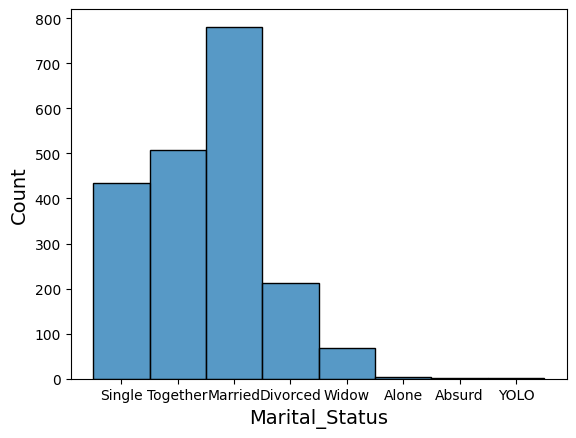

In [71]:
import seaborn as sns
sns.histplot(data=shoppingDF, x='Marital_Status', bins=20)

<Axes: xlabel='Marital_Status', ylabel='Count'>

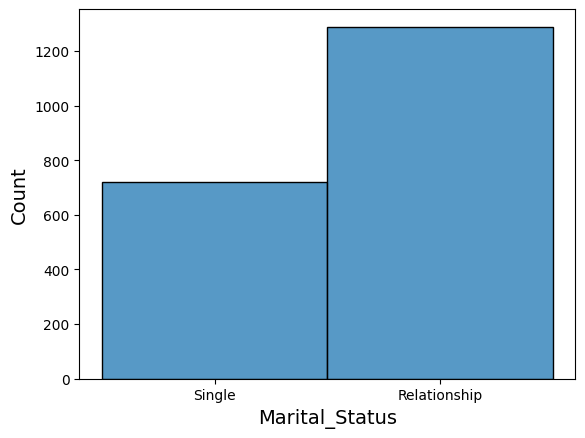

In [72]:
single = 'Single'
replaceList = {'Married': 'Relationship', 'Together': 'Relationship', 'Divorced': single, 'Widow': single, 'Alone': single, 'YOLO': single}
shoppingDF = shoppingDF.replace({'Marital_Status': replaceList})
shoppingDF = shoppingDF.drop(shoppingDF[shoppingDF['Marital_Status'] == 'Absurd'].index)
sns.histplot(data=shoppingDF, x='Marital_Status', bins=20)

In [73]:
shoppingDF = pd.get_dummies(shoppingDF, columns=['Marital_Status'], drop_first=True)
shoppingDF = pd.get_dummies(shoppingDF, columns=['Education'], drop_first=True)
shoppingDF.head()

Year_Birth  Estimated_Income  Kid_home  Teen_home Registration_date  \
0        1957           58138.0         0          0        04.09.2020   
1        1954           46344.0         1          1        08.03.2022   
2        1965           71613.0         0          0        21.08.2021   
3        1984           26646.0         1          0        10.02.2022   
4        1981           58293.0         1          0        19.01.2022   

   Recency  Exist_Complain  MntWines  MntFruits  MntMeatProducts  ...  \
0       58               0       635         88              546  ...   
1       38               0        11          1                6  ...   
2       26               0       426         49              127  ...   
3       26               0        11          4               20  ...   
4       94               0       173         43              118  ...   

   MntSweetProducts  MntGoldProds  NumWebPurchases  NumCatalogPurchases  \
0                88            88                8                   10   
1                 1             6                1                    1   
2                21            42                8                    2   
3                 3             5                2                    0   
4                27            15                5                    3   

   NumStorePurchases  Marital_Status_Single  Education_Basic  \
0                  4                      1                0   
1                  2                      1                0   
2                 10                      0                0   
3                  4                      0                0   
4                  6                      0                0   

   Education_Graduation  Education_Master  Education_PhD  
0                     1                 0              0  
1                     1                 0              0  
2                     1                 0              0  
3                     1                 0              0  
4                     0                 0              1  

[5 rows x 21 columns]

In [74]:
import datetime as dt
# Convert 'dteday' column to datetime format
shoppingDF['Registration_date'] = pd.to_datetime(shoppingDF['Registration_date'], format='%d.%m.%Y')
# Because it is easier to work with ordinal values in we convert'dteday'
shoppingDF['Registration_date'] = shoppingDF['Registration_date'].map(dt.datetime.toordinal)

In [75]:
# Create a new column 'Kids_and_teens_home'
shoppingDF['Children_home'] = (shoppingDF['Kid_home'] == 1) & (shoppingDF['Teen_home'] == 1)

# Convert boolean values to integers (0 or 1)
shoppingDF['Children_home'] = shoppingDF['Children_home'].astype(int)

# Drop the 'Kids_home' and 'Teens_home' columns
shoppingDF = shoppingDF.drop(['Kid_home', 'Teen_home'], axis=1)


# 1. Cluster the existing data based on appropriate procedures. Justify how you would cluster the data set based on the results.  


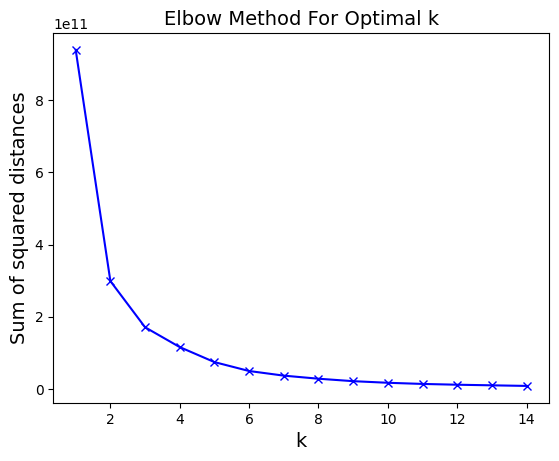

In [76]:
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Ignore the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Create the KMeans model with a range of different cluster sizes
scores = []
range_values = range(1, 15)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(shoppingDF)
    scores.append(kmeans.inertia_)
    
# Plot the elbow curve
plt.plot(range_values, scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


The elbow is at 3, so I will use 3 clusters.

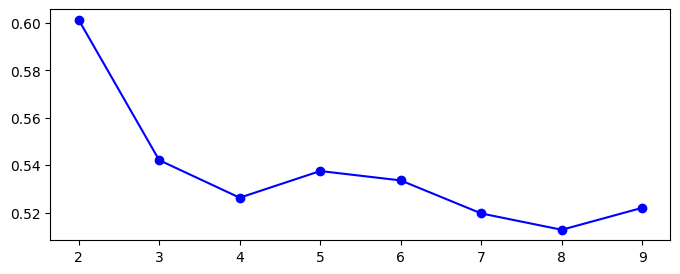

In [77]:
from sklearn.metrics import silhouette_score
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(shoppingDF) for k in range(1, 10)]
silhouette_scores = [silhouette_score(shoppingDF, model.labels_) for model in kmeans_per_k [1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.show()

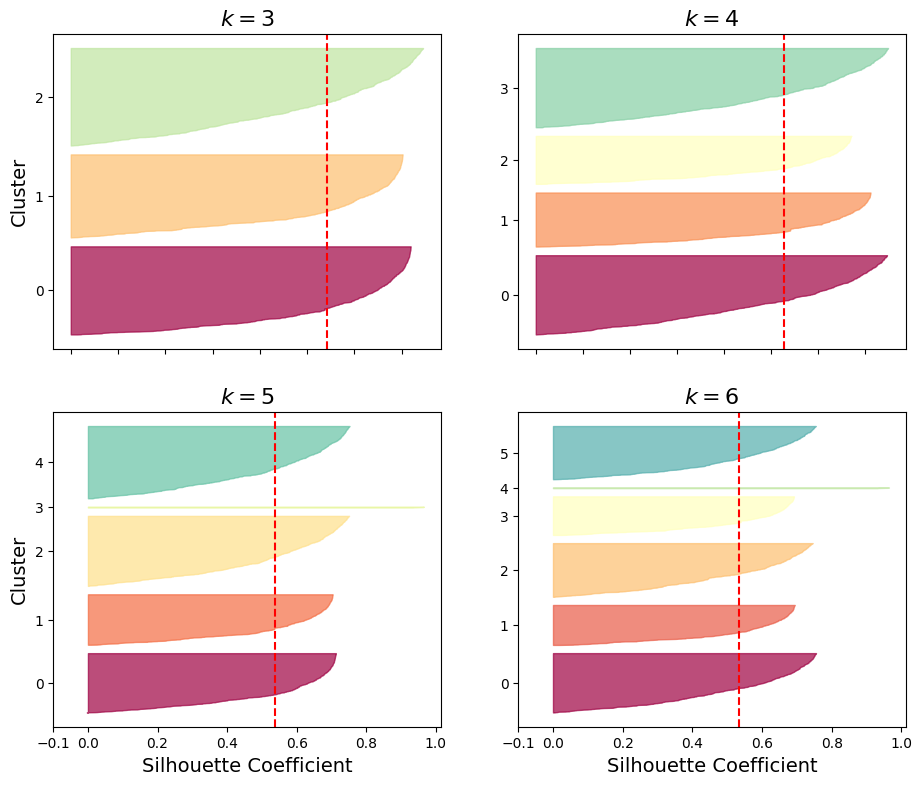

In [78]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import numpy as np
plt.figure(figsize=(11, 9))
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(shoppingDF)for k in range(1, 10)]
for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(shoppingDF, y_pred)
    
    padding = len(shoppingDF) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        
        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)
    
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

K = 3 is the best choice for the number of clusters, because the elbow is at 3. The silhouette model shows that all numbers of clusters are suitable for the data, which is why I chose 3.

In [79]:
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(shoppingDF)
shoppingDF['Cluster'] = y_pred
shoppingDF.head()



Year_Birth  Estimated_Income  Registration_date  Recency  Exist_Complain  \
0        1957           58138.0             737672       58               0   
1        1954           46344.0             738222       38               0   
2        1965           71613.0             738023       26               0   
3        1984           26646.0             738196       26               0   
4        1981           58293.0             738174       94               0   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   ...  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0  ...                8                   10                  4   
1  ...                1                    1                  2   
2  ...                8                    2                 10   
3  ...                2                    0                  4   
4  ...                5                    3                  6   

   Marital_Status_Single  Education_Basic  Education_Graduation  \
0                      1                0                     1   
1                      1                0                     1   
2                      0                0                     1   
3                      0                0                     1   
4                      0                0                     0   

   Education_Master  Education_PhD  Children_home  Cluster  
0                 0              0              0        2  
1                 0              0              1        2  
2                 0              0              0        1  
3                 0              0              0        0  
4                 0              1              0        2  

[5 rows x 21 columns]

In [80]:
# Pairplot for purchase behavior variables
sns.pairplot(data=shoppingDF, vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], hue='Cluster')

# Pairplot for demographic variables
sns.pairplot(data=shoppingDF, vars=['Year_Birth', 'Estimated_Income', 'Children_home', 'Recency', 'Marital_Status_Single', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD'], hue='Cluster')


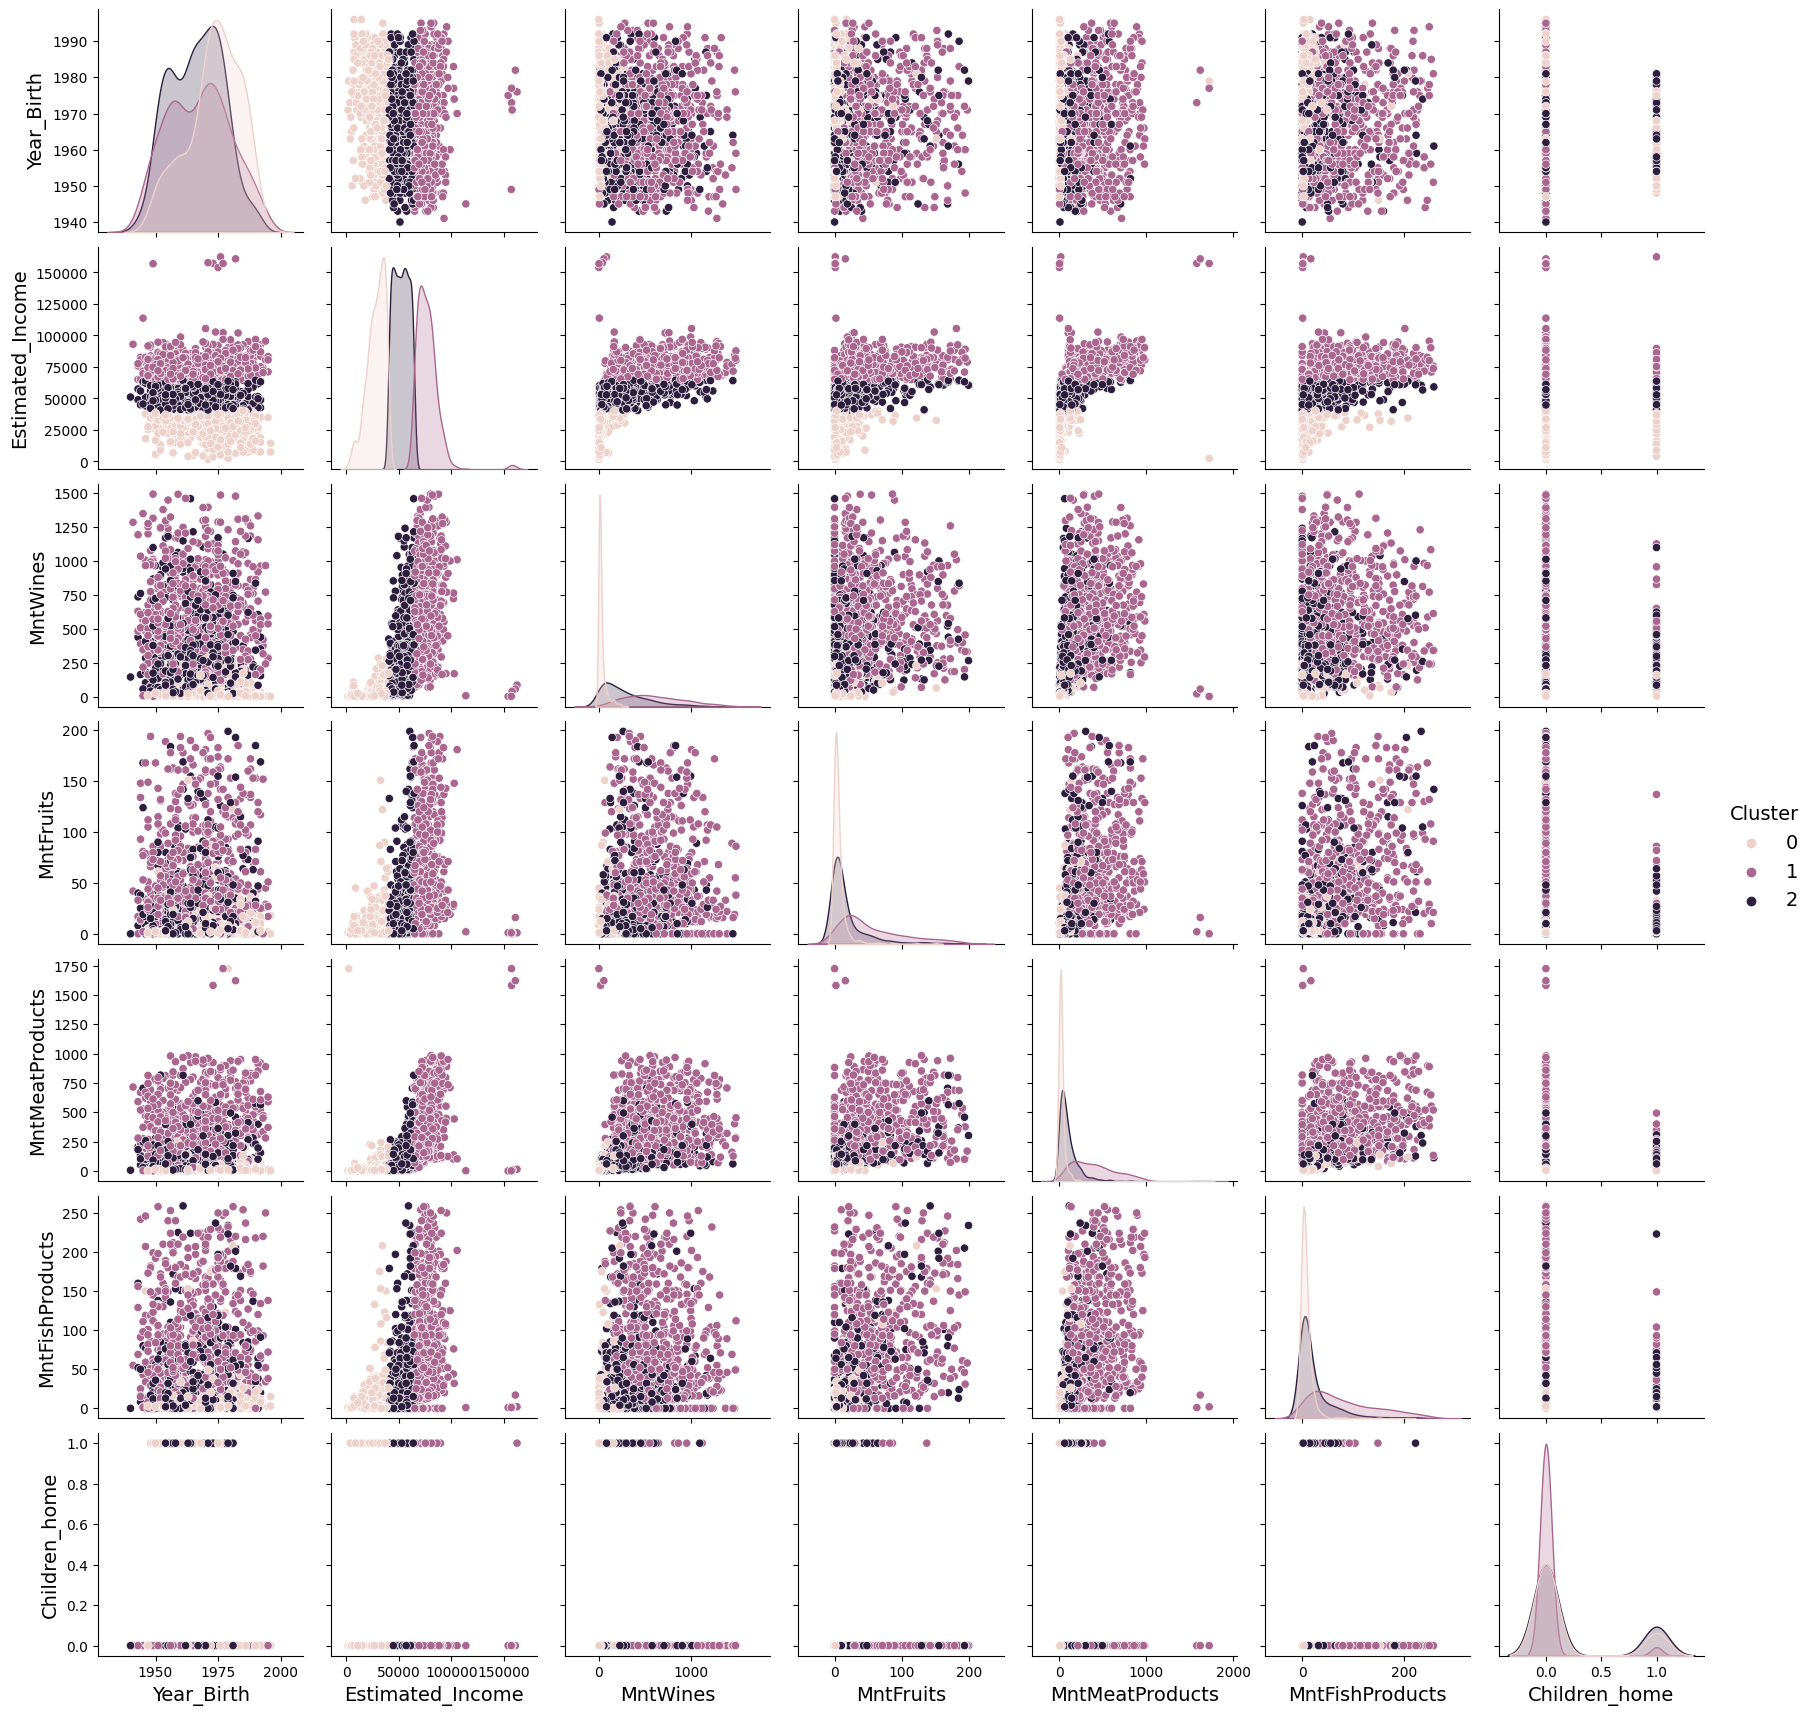

In [ ]:
sns.pairplot(data=shoppingDF, vars=['Year_Birth', 'Estimated_Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'Children_home'], hue='Cluster')


In [ ]:
shoppingDF.groupby('Cluster').mean()


Year_Birth  Estimated_Income  Registration_date    Recency  \
Cluster                                                                
0        1973.279211      28117.047041      737983.632777  48.493171   
1        1967.302738      77106.937198      737991.487923  48.887279   
2        1966.246914      52270.466392      737975.312757  49.536351   

         Exist_Complain    MntWines  MntFruits  MntMeatProducts  \
Cluster                                                           
0              0.015175   30.295903   6.128983        25.963581   
1              0.008052  614.607085  56.521739       398.628019   
2              0.005487  288.925926  18.855967        99.138546   

         MntFishProducts  MntSweetProducts  MntGoldProds  NumWebPurchases  \
Cluster                                                                     
0               9.003035          6.180577     17.890744         2.183612   
1              82.420290         60.558776     68.756844         5.405797   
2              24.786008         17.775034     45.111111         4.728395   

         NumCatalogPurchases  NumStorePurchases  Marital_Status_Single  \
Cluster                                                                  
0                   0.531108           3.072838               0.352049   
1                   5.428341           8.360709               0.352657   
2                   2.240055           6.054870               0.368999   

         Education_Basic  Education_Graduation  Education_Master  \
Cluster                                                            
0               0.074355              0.499241          0.150228   
1               0.000000              0.533011          0.156200   
2               0.000000              0.482853          0.185185   

         Education_PhD  Children_home  
Cluster                                
0             0.160850       0.198786  
1             0.236715       0.038647  
2             0.251029       0.241427

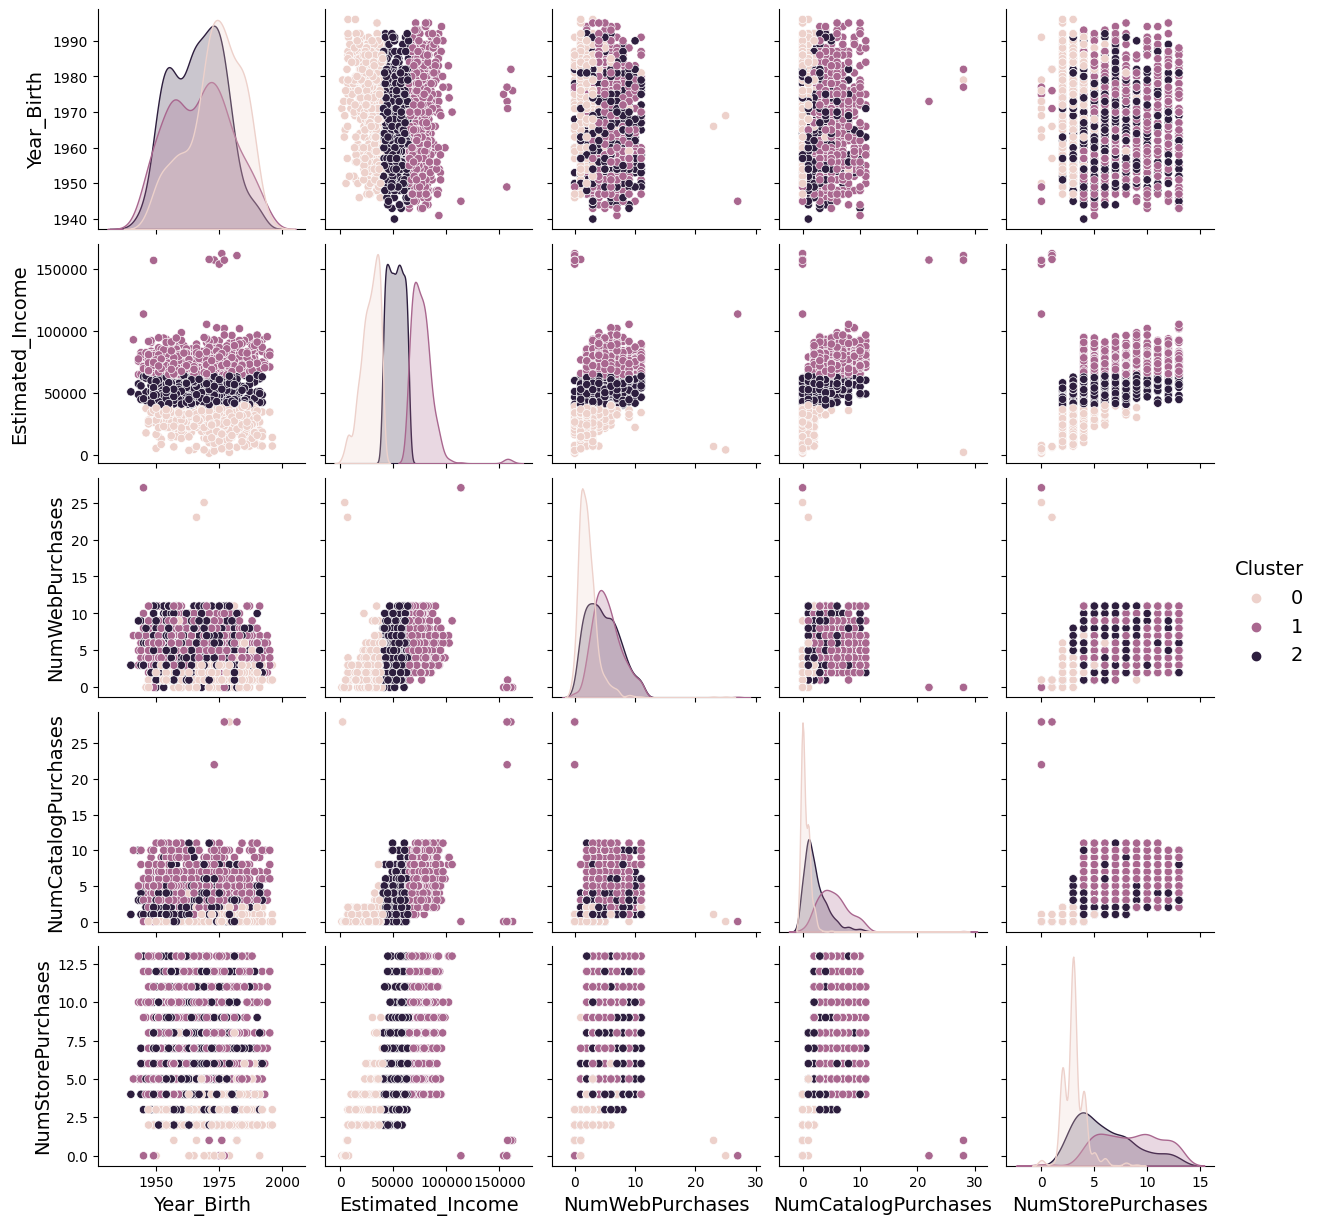

In [ ]:
sns.pairplot(data=shoppingDF, vars=['Year_Birth', 'Estimated_Income', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], hue='Cluster')

In the pairplot we can see, that the older the customer is, the more estimated income he has. Also the more income he has, the more things he buys.

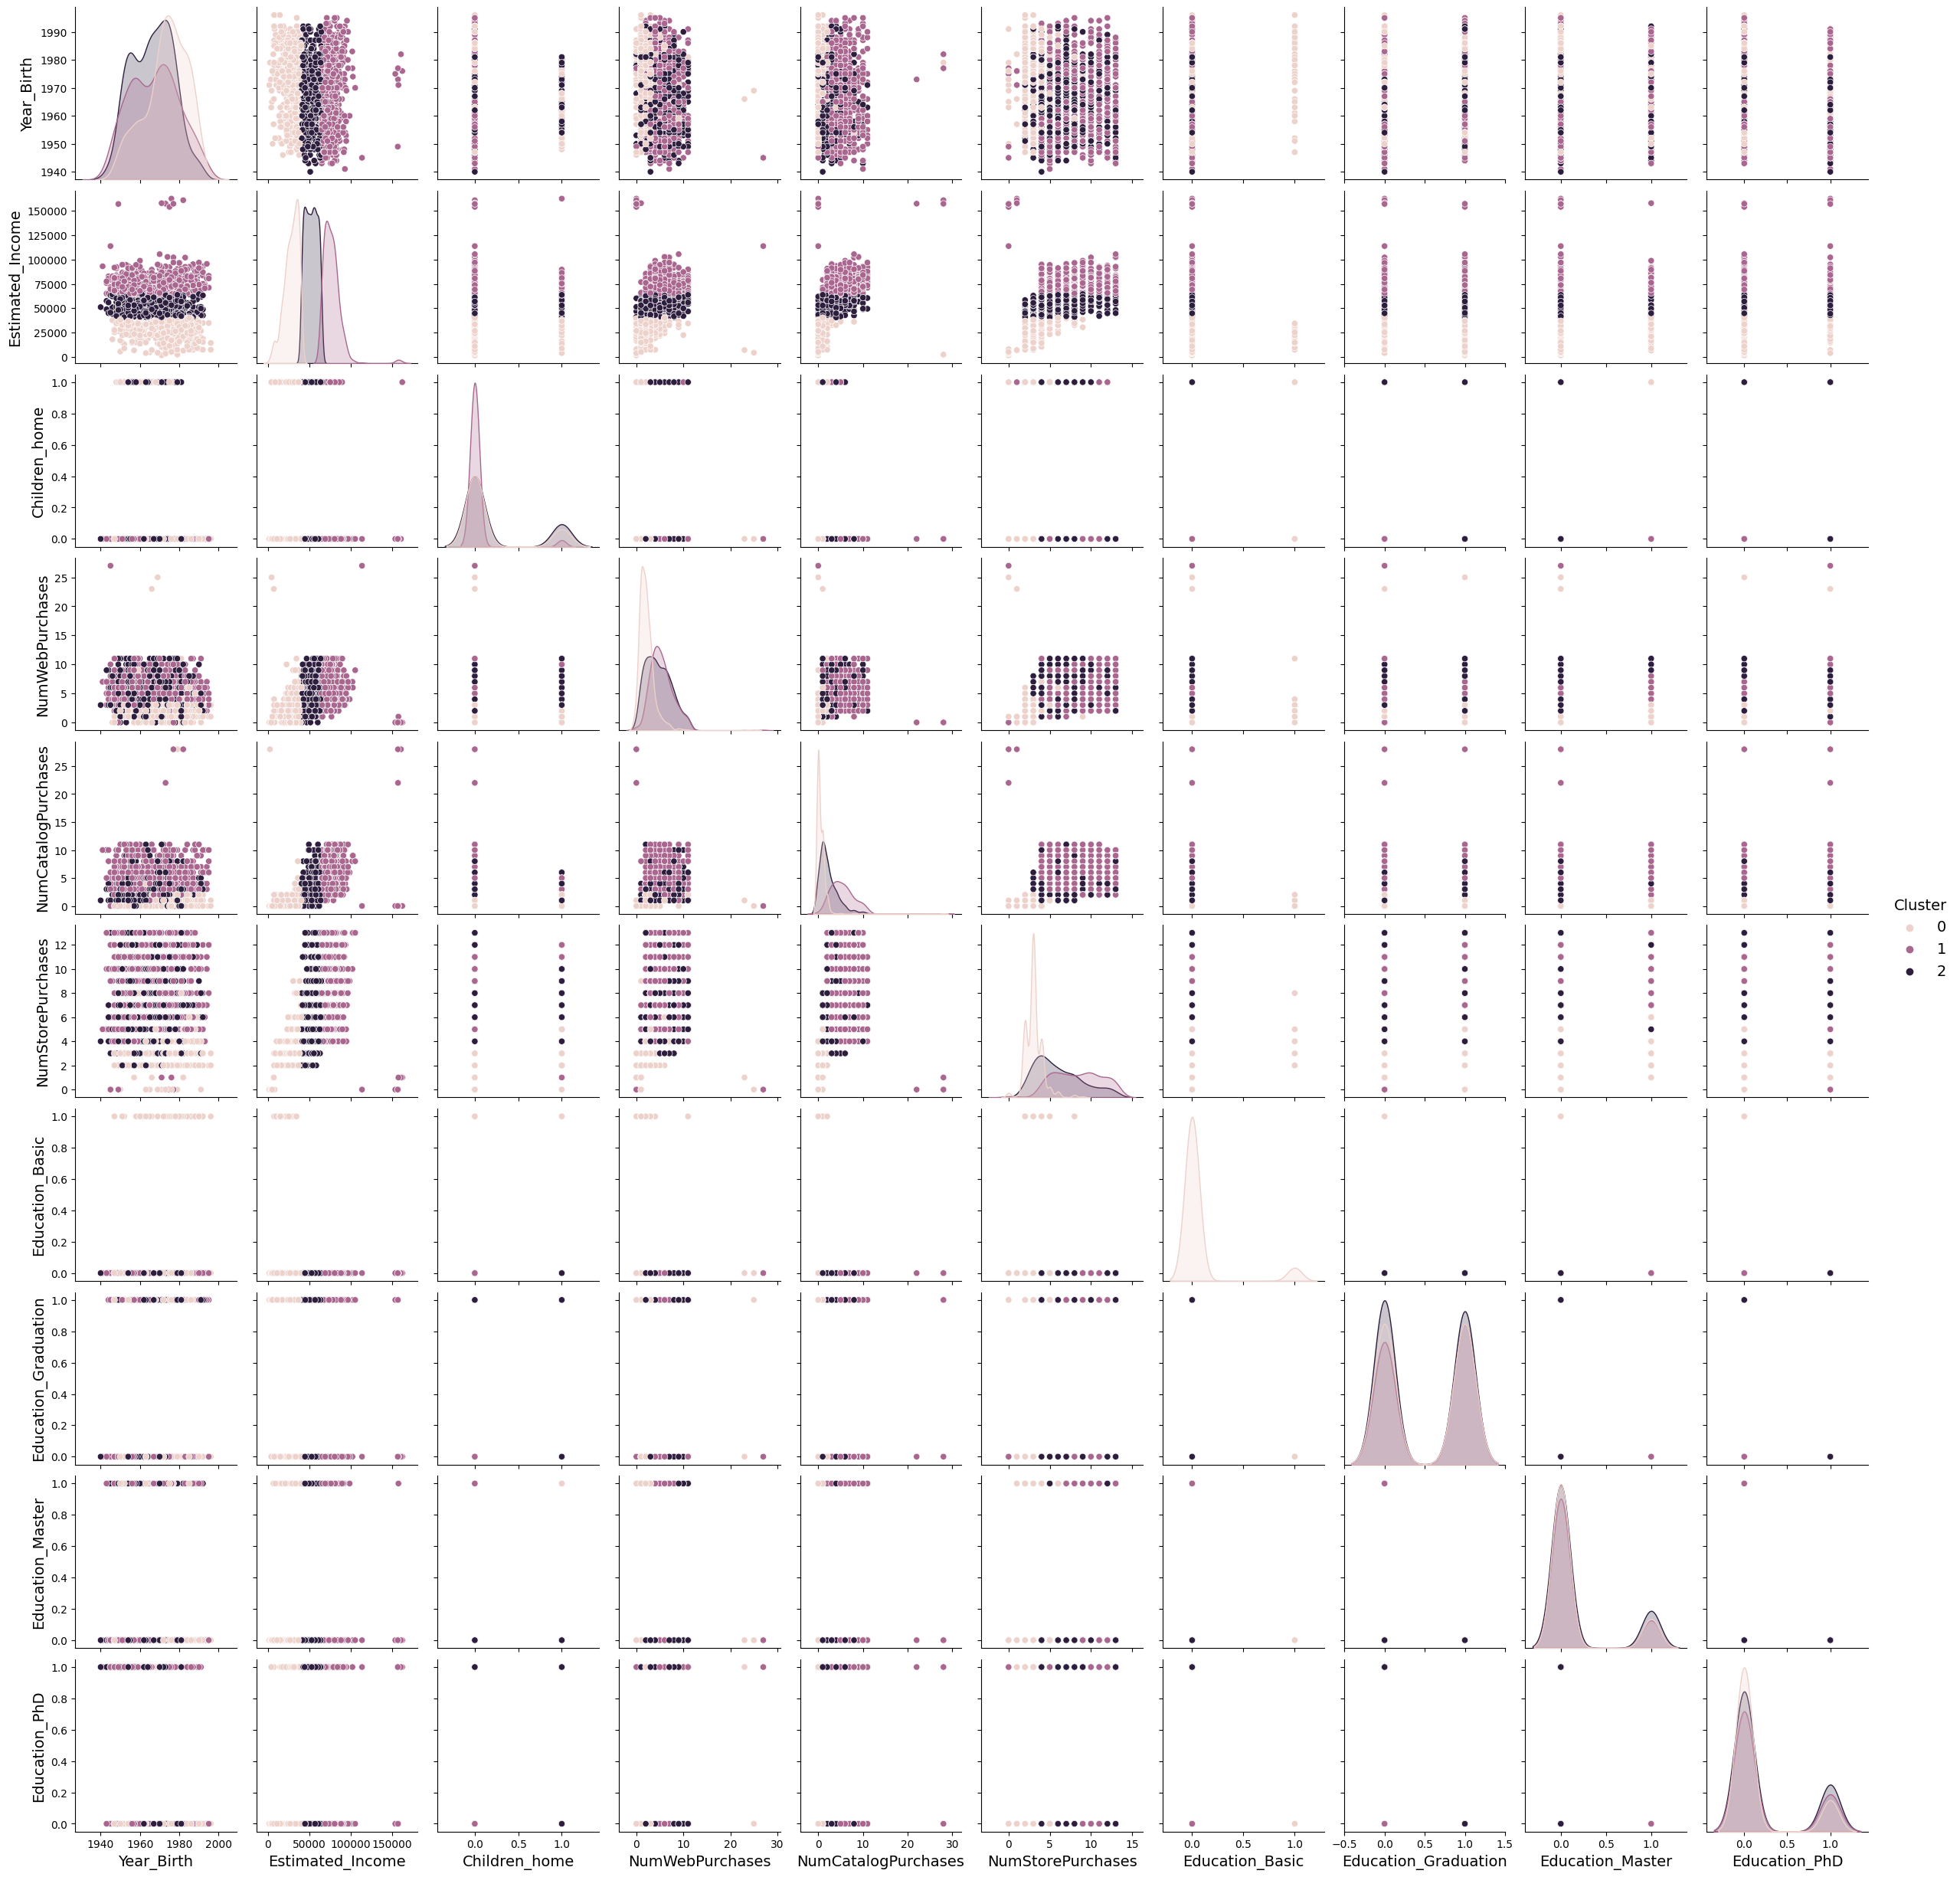

In [ ]:
sns.pairplot(data=shoppingDF, vars=['Year_Birth', 'Estimated_Income', 'Children_home', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD'], hue='Cluster')


## Describe the clusters found based on the characteristics of the attributes of the customers and the cluster size.  

We can see that estimated income is the strongest indicator of the cluster to which a customer belongs. You can also see that customers with higher incomes also buy more. What is important is that age is actually relatively independent of income. Young customers do not have less income than older ones. 

What is also important is that customers with low incomes buy much more often than customers with higher incomes. Customers with high incomes often buy more at once. 
Customers with low incomes also have only a basic education, whereas customers with more income usually have a better education.


## What recommendation could you give the marketing department based on your analysis? 

Customers with low incomes buy significantly more often than customers with higher incomes, so the marketing department could focus on reaching out to this group frequently with cost-effective products. 
Since age is relatively independent of income, the marketing department could consider customizing marketing campaigns for different age groups, keeping in mind that income is a more important indicator of customer behavior.
Customers with high incomes often buy more at once, so the marketing department could consider offering high-value products that appeal to this group.

